# Project: FIFA 21 Players Data Analysis and Visualization

**Instructions for Students:**

Please carefully follow these steps to complete and submit your assignment:

1. **Completing the Assignment**: You are required to work on and complete all tasks in the provided assignment. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive. This will be the repository for all your completed assignment files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Assignment**: Upon completion of your assignment, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your assignment Google Drive folder. This is crucial for the submission and evaluation of your assignment.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth assignment process for you and the reviewers.

**Description:**

Welcome to this data analysis and visualization assignment! In this assignment, we will be exploring the 'FIFA 21 Players' dataset which comprises a rich variety of information about soccer players from around the world. The data extracted are in 'csv' file format.

Your task is to clean and prepare the data for analysis, and then leverage your data visualization skills to uncovers insights about FIFA 21 players, teams, and overall value and wage dynamics.

Here are your tasks outlined in detail:

1. **Data Cleaning**: The initial dataset contains some unnecessary and redundant information. Your first task is to clean and prepare it for analysis. In doing so:
    - Remove the 'Unnamed: 0' column from the dataset.
    - Removing the Newline Characters.
    - Look for columns which contain star ('★') characters. Remove these characters from all such columns.
    - Fill in the missing values using an appropriate method.
    - In the 'Value', 'Wage', and 'Release Clause' columns, remove the '€', 'K', and 'M' characters and convert the currency value to 'int'. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.

2. **Data Visualization**: After the data has been cleaned and prepared, use appropriate data visualization methods to represent the data as follows:
    - Create a Pie Chart to display the preferred foot ('Left' or 'Right') among the FIFA 21 players.
    - Use a Bar Plot to represent the top 3 FIFA 21 players.
    - Visualize the best FIFA teams from 100 players based on the 'OVA' score using a Bar Plot.
    - Use a Bar Plot to display the top 10 most valuable FIFA teams.
    - Create a Scatter Plot to show players who are highly valuable but still underpaid.

Ensure all plots are fully labeled with titles, x and y variables, and a legend if necessary.

Remember, the goal of this assignment is not just about getting the right answer but also about presenting your findings in a clear, logical, and visually appealing manner. Good luck and enjoy the analysis!

**Note for Students:**

Please bear in mind that, although you may tackle most of the assignment problems in any order you prefer, **tasks 9 and 10 require that you complete task 5 first**. This is due to the dependencies these tasks have on the cleaned and prepared financial data ('Value' and 'Wage' columns) from task 5.

**You will not be able to accurately complete tasks 9 and 10 without having concluded task 5**. Conversely, other tasks in this assignment do not have such interdependencies and can be completed independently.

Happy analyzing!

## Import package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read file

In [ ]:
url = 'https://storage.googleapis.com/rg-ai-bootcamp/assignment-1/fifa21_raw_data.csv'
fifa_df = pd.read_csv(url, low_memory=False)
fifa_df

,Unnamed: 0,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,562
2,2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,...,High,High,4 ★,76,86,93,88,64,78,207
4,4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,18975,258760,B. Hough,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


## Data Cleaning

**Task 1: Removing the 'Unnamed: 0' Column**

In this first task, you have to deal with unnecessary data in our data set. Specifically, the data set contains a column labeled `Unnamed: 0`, which does not make a significant contribution to our data analysis needs. Your goal is to effectively remove this column from the `FIFA 21 Players` data set. Remember that it is very important to manipulate only the unneeded parts of the data and keep the rest intact.

Please make sure to:
- Read the CSV file carefully to understand the structure of the data.
- Identify a suitable method to remove the specified column from the DataFrame.
- Validate that the column has been removed successfully by inspecting the resulting DataFrame.

In [ ]:
fifa_df = fifa_df.drop(['Unnamed: 0'], axis=1)
fifa_df

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,CM,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [ ]:
print(fifa_df.head(1).to_string())

       ID      Name      LongName Nationality  Age  ↓OVA  POT                  Club     Contract   Positions Height Weight Preferred Foot  BOV Best Position       Joined Loan Date End    Value   Wage Release Clause  Total Stats  Base Stats  W/F  SM     A/W  D/W   IR  PAC  SHO  PAS  DRI  DEF  PHY Hits
0  158023  L. Messi  Lionel Messi   Argentina   33    93   93  \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  170cm   72kg           Left   93            RW  Jul 1, 2004           NaN  €103.5M  €560K        €138.4M         2231         466  4 ★  4★  Medium  Low  5 ★   85   92   91   95   38   65  771


**Task 2: Removing the Newline Characters**

In your second task, you will navigate into deeper waters of data cleaning by removing the newline characters (`\n`) from the dataset. This nuisance feature could occur in various columns and can disrupt accurate data parsing. So, it's an important step to assure the integrity and consistency of our data.

Here are a few tips to guide you on this task:
- Start by detecting which columns in the 'FIFA 21 Players' dataset contain newline characters
- Develop a strategy to effectively clean the data by replacing or removing these characters
- As before, make sure your solution keeps all other aspects of the data untouched
- Validate your solution by examining the cleaned dataset to ensure no more newline characters exist

In [ ]:
fifa_df = fifa_df.replace(r'\n',' ', regex=True)
fifa_df

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,CB,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,England,17,47,67,Oldham Athletic,2020 ~ 2021,CM,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,Derry City,2019 ~ 2020,CM,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2020 ~ 2022,RW,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [ ]:
club_col = fifa_df['Club'].head()
print(club_col)

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
Name: Club, dtype: object


**Task 3: Removing 'Star' Characters**

In this third task, we will continue with the theme of data cleaning. Your job in this task is to identify and eliminate the 'star' (★) characters from all the columns in the 'FIFA 21 Players' dataset.

As guidelines for you:
- Begin with an overview of the dataset to identify the columns that contain the 'star' ("*") characters.
- Formulate a strategy to remove these characters without distorting the remaining data in those columns.
- Adopt a solution that maintains the integrity of the original data.
- Finally, validate your solution by examining the cleaned dataset, ensuring that no 'star' characters remain in any columns.

In [ ]:
fifa_df = fifa_df.replace(r'★','', regex=True)
fifa_df[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,3,2,1


In [ ]:
star_col = fifa_df[['W/F', 'SM', 'IR']].head()
print(star_col)

  W/F SM  IR
0  4   4  5 
1  4   5  5 
2  3   1  3 
3  5   4  4 
4  5   5  5 


**Task 4: Filling Missing Values**

In your fourth task, we turn our attention to missing values in our dataset. 'Loan End Date' and 'Hits' columns in the 'FIFA 21 Players' dataset contain some missing entries, which you are tasked with handling. Specifically, you are to fill the missing values in the 'Loan End Date' column with 'Not on Loan', and for the 'Hits' column, use the string 'Unknown'.

Here are your pointers:
- Start with identifying the missing values in the mentioned columns of 'FIFA 21 Players' dataset.
- Apply appropriate methods to fill in the missing entries in 'Loan End Date' with 'Not on Loan' and 'Hits' column with 'Unknown', while maintaining the integrity of the existing data.
- After filling the missing values, verify that these have been correctly filled by inspecting the final state of your DataFrame.

In [ ]:
fifa_df = fifa_df.fillna({'Loan Date End': 'Not on Loan', 'Hits': 'Unknown'})

fifa_df[['Loan Date End', 'Hits']]

,Loan Date End,Hits
0,Not on Loan,771
1,Not on Loan,562
2,Not on Loan,150
3,Not on Loan,207
4,Not on Loan,595
...,...,...
18974,Not on Loan,Unknown
18975,Not on Loan,Unknown
18976,Not on Loan,Unknown
18977,Not on Loan,Unknown


In [ ]:
missing_vals_col = fifa_df[['Loan Date End', 'Hits']].tail()
print(missing_vals_col)

      Loan Date End     Hits
18974   Not on Loan  Unknown
18975   Not on Loan  Unknown
18976   Not on Loan  Unknown
18977   Not on Loan  Unknown
18978   Not on Loan  Unknown


**Task 5: Cleaning and Converting Financial Data**

In this fifth task, we will focus on improving the readability and workability of the financial data within our dataset. Here, you'll need to identify the 'Value', 'Wage', and 'Release Clause' columns in the 'FIFA 21 Players' dataset, which contain '€', 'K', and 'M' characters.

Here's your course of action:
- The first step involves eliminating the '€' character in these columns, leaving only numeric values and 'K' or 'M' characters.
- After that, you're tasked with interpreting the 'K' and 'M' suffixes in these fields as 'x1000' and 'x1,000,000' respectively and subsequently changing the values in light of this new understanding.
- This interpreted data should then be converted to an 'int' data type, considering that these are financial amounts.

Confirmation of the successful completion of the task can be achieved by validating your dataset once the changes have been made. This task will refine not just your data cleaning capabilities, but also your proficiency in handling and comprehending numerical data.

In [ ]:
def convert_value(val):
    if 'M' in val:
        val = float(val.replace('€', '').replace('M', '')) * 1000000
    elif 'K' in val:
        val = float(val.replace('€', '').replace('K', '')) * 1000
    else:
        val = float(val.replace('€', ''))
    return val

columns_to_convert = ['Value', 'Wage', 'Release Clause']

for column in columns_to_convert:
    fifa_df[column] = fifa_df[column].apply(convert_value)
    fifa_df[column] = fifa_df[column].astype(int)

fifa_df[['Name', 'Value', 'Wage', 'Release Clause']].sort_values(by=['Value', 'Release Clause'], ascending=False)

,Name,Value,Wage,Release Clause
8,K. Mbappé,185500000,160000,203100000
4,Neymar Jr,132000000,270000,166500000
3,K. De Bruyne,129000000,370000,161000000
29,J. Sancho,124000000,82000,132100000
65,K. Havertz,121000000,105000,119700000
...,...,...,...,...
17220,A. Al Hidhani,0,0,0
17343,A. Sanghu,0,0,0
17659,M. Chada,0,0,0
17661,E. Suresh,0,0,0


In [ ]:
converted_col = fifa_df[['Name', 'Value', 'Wage', 'Release Clause']].head()
print(converted_col)

                Name      Value    Wage  Release Clause
0           L. Messi  103500000  560000       138400000
1  Cristiano Ronaldo   63000000  220000        75900000
2           J. Oblak  120000000  125000       159400000
3       K. De Bruyne  129000000  370000       161000000
4          Neymar Jr  132000000  270000       166500000


## Data Visualization

**Task 6: Pie Chart Creation - Preferred Foot**

Moving on to the realm of data visualization, your sixth task is to create a Pie Chart that displays the preferred foot ('Left' or 'Right') among the 'FIFA 21 Players'. This visualization would allow us to quickly grasp the proportion of players who prefer using one foot over the other.

Here are your key steps:
- Identify the respective count of players who prefer 'Left' and 'Right' foot from the dataset.
- Use this data to create a Pie Chart which accurately represents these proportions.
- Your Pie Chart should include appropriate labels and title for better readability.

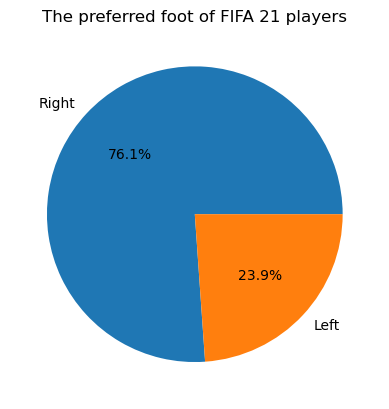

In [ ]:
foot_preferred_count = fifa_df['Preferred Foot'].value_counts()
foot_preferred = foot_preferred_count.index
foot_count = foot_preferred_count.values

plt.pie(foot_count, labels=foot_preferred, autopct='%1.1f%%')
plt.title('The preferred foot of FIFA 21 players')
plt.show()

**Task 7: Bar Plot Creation - Top 3 FIFA 21 Players**

In your seventh task of this assignment, you are to create a bar plot displaying the top 3 FIFA 21 players according to their 'OVA' scores. This graphical representation would help us quickly identify and compare goal averages between the players who have the most influence on the field.

Here's your task outline:
- From the dataset, extract the top 3 players based on their OVA scores.
- Now, plot this data using a bar plot with the player names on the x-axis and their respective 'OVA' scores on the y-axis.
- Make sure your bar plot is correctly labeled with title, x and y variable details, and provides a clear indication of the players and their corresponding scores.

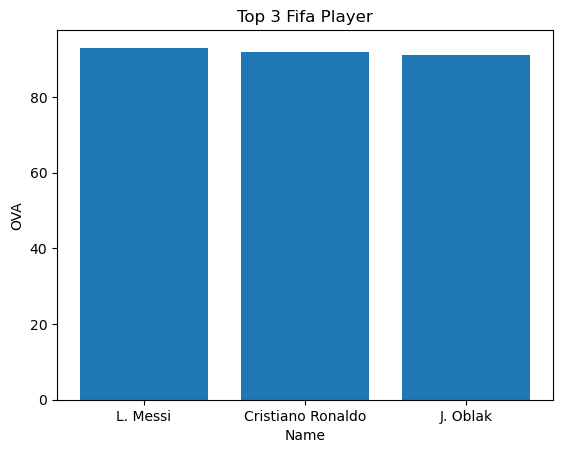

In [ ]:
best_players = fifa_df.sort_values(by='↓OVA', ascending=False)
top3_players = best_players.head(3)

selected__player = top3_players[['Name', '↓OVA',]]

plt.bar(selected__player['Name'], selected__player['↓OVA'])
plt.title('Top 3 Fifa Player')
plt.xlabel('Name')
plt.ylabel('OVA')
plt.show()

**Task 8: Bar Plot Creation - Best FIFA Teams**

For your eighth task, your goal is to identify and display the best FIFA teams, as determined by the sum of the 'OVA' scores of their top 100 players. This exercise provides an opportunity to transform raw data into meaningful insights, which can assist in comparing and ranking teams based on cumulative player performance.

Here's your plan of action:
- Start by grouping the dataset according to the teams and then identifying the top 100 players per team according to their OVA scores.
- Calculate the sum of the 'OVA' scores of these top players for each team.
- Finally, use a bar plot to visually represent these calculated values to highlight and compare the performance of each team.
- Ensure appropriate labeling on the bar plot, including title, x, and y variable details, for easy comprehension.

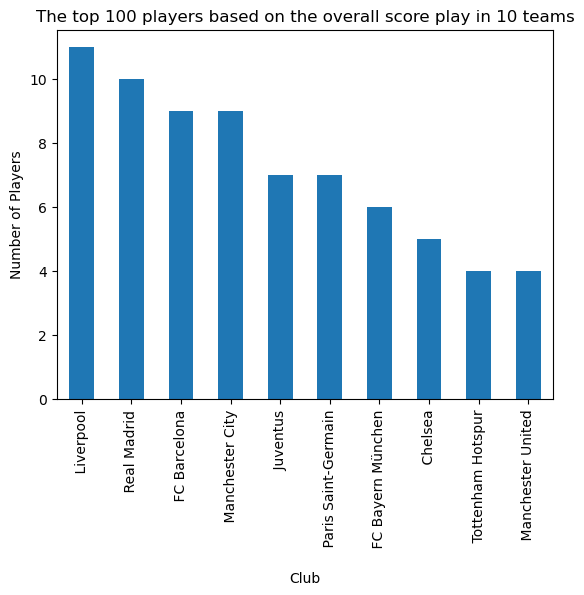

In [ ]:
df_sorted = fifa_df.sort_values(by='↓OVA', ascending=False)
df_top100 = df_sorted.head(100)

club_count = df_top100['Club'].value_counts().head(10)

club_count.plot(kind='bar')
plt.title('The top 100 players based on the overall score play in 10 teams')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.show()

**Task 9: Bar Plot Creation - Top 10 Most Valuable FIFA Teams**

In the ninth task, your focus shift towards identifying and displaying the 10 most valuable FIFA teams, determined according to the player with the highest 'Value' among their top 100 players. This gives an indication of the teams that possess high-value players and are thus crucial in the game.

Here's your roadmap to complete the task:
- Group the data by teams and identify the player with the highest 'Value' for each team among their top 100 players.
- From this processed data, further identify the top 10 teams with the most valuable players.
- Now create a bar plot to visualize these top 10 teams and the highest player value for each. Ensure the team names are on the x-axis and player values on the y-axis.
- Don't forget to appropriately label the plot in terms of title, x and y axis labels, for easy understanding.

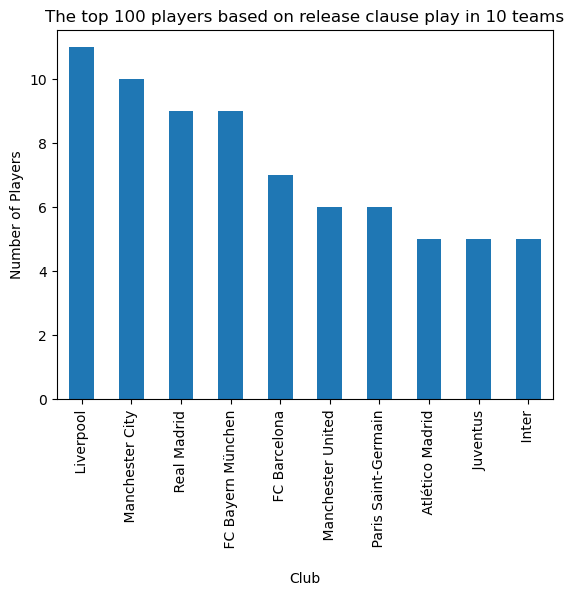

In [ ]:
df_sorted = fifa_df.sort_values(by='Value', ascending=False)
df_top100 = df_sorted.head(100)

club_count2 = df_top100['Club'].value_counts().head(10)

club_count2.plot(kind='bar')
plt.title('The top 100 players based on release clause play in 10 teams')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.show()

**Task 10: Scatter Plot Creation - High Value, Underpaid Players**

In the tenth and final task of this assignment, your challenge is to create a scatter plot to visualize high value but low paid players. This visualization will help us understand the difference that exists between player values and wages and identify any outliers in the 'Value' and 'Wage' columns.

Here's your guide to tackle this task:
- Identify the players who have high 'Value' but relatively low 'Wage' in the 'FIFA 21 Players' dataset.
- Use this filtered data to create a scatter plot, where one axis represents the 'Value' and the other represents the 'Wage' of these players.
- Remember to correctly label your scatter plot including an appropriate title, x and y axis details, for an accurate understanding of what your plot represents.

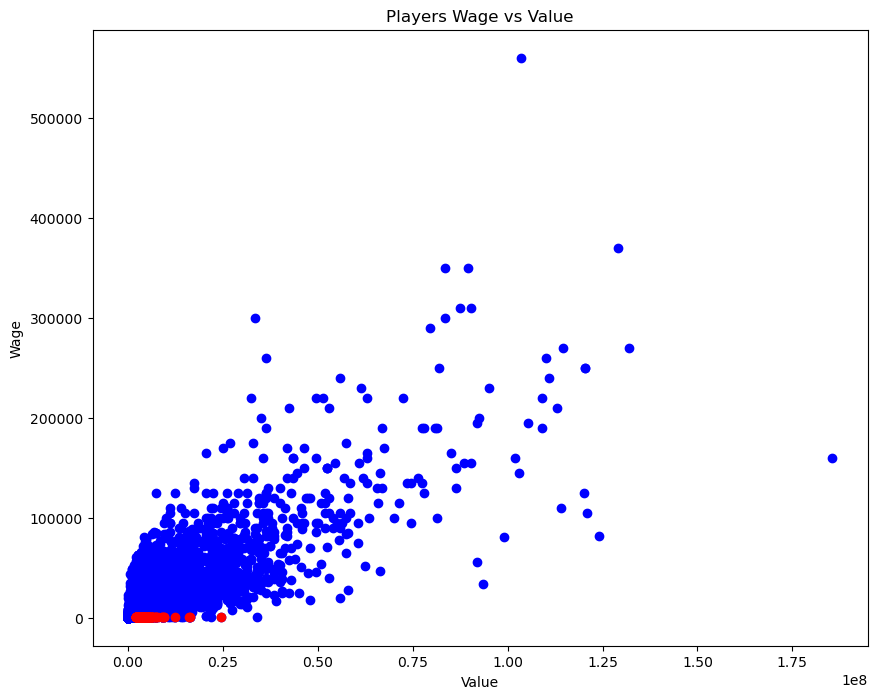

In [ ]:
#choose a threshold for high value and low wage
value_threshold = fifa_df['Value'].quantile(0.75) # Top 25%
wage_threshold = fifa_df['Wage'].quantile(0.25) # Bottom 25%

high_value_low_wage = (fifa_df['Value'] > value_threshold) & (fifa_df['Wage'] < wage_threshold)
underpaid_players = fifa_df[high_value_low_wage]

plt.figure(figsize=(10, 8))

# plot all players in blue
plt.scatter(fifa_df['Value'], fifa_df['Wage'], color='blue')

# overlay underpaid talented players in red
plt.scatter(underpaid_players['Value'], underpaid_players['Wage'], color='red')

plt.title('Players Wage vs Value')
plt.xlabel('Value')
plt.ylabel('Wage')

plt.show()